## Embeddings

In [119]:
from gensim.models import Word2Vec
import numpy as np

# Sample text data
sentences = [
    ['this', 'is', 'a', 'sample', 'sentence'],
    ['another', 'example', 'sentence', 'for', 'embedding'],
    ['text', 'data', 'can', 'be', 'interesting'],
    ['word2vec', 'embeddings', 'capture', 'semantic', 'meaning']
]

# Train Word2Vec model
model = Word2Vec(sentences, vector_size=10, window=10, min_count=1, sg=0)

In [120]:
# select embedding for the word 'sentence'
embedding = model.wv['data']
print(embedding)

embedding_2 = model.wv['word2vec']
print(embedding_2)

# compute cosine similarity between the two embeddings
similarity = np.dot(embedding, embedding_2) / (np.linalg.norm(embedding) * np.linalg.norm(embedding_2))
print(similarity)

[-0.00410223 -0.08368949 -0.05600012  0.07104538  0.0335254   0.0722567
  0.06800248  0.07530741 -0.03789154 -0.00561806]
[ 0.0781896  -0.09510304 -0.00204943  0.03471306 -0.00940001  0.08380692
  0.09011418  0.0653716  -0.0071355   0.07708712]
0.71891534


In [121]:
# calculate cosine similarity between various word pairs
print(model.wv.similarity('word2vec', 'data'))

0.7189153


### Shakespeare

In [311]:
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
from gensim.models import Word2Vec
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

nltk.download('punkt')

# Shakespearean text
shakespeare_text = """
Shall I compare thee to a summer's day?
Thou art more lovely and more temperate:
Rough winds do shake the darling buds of May,
And summer's lease hath all too short a date:
Sometime too hot the eye of heaven shines,
And often is his gold complexion dimmed;
And every fair from fair sometime declines,
By chance or nature's changing course untrimmed;
But thy eternal summer shall not fade
Nor lose possession of that fair thou owest;
Nor shall Death brag thou wanderest in his shade,
When in eternal lines to time thou growest:
So long as men can breathe or eyes can see,
So long lives this, and this gives life to thee.
"""

# Tokenize text into sentences
sentences = sent_tokenize(shakespeare_text.lower())

# Tokenize sentences into words
tokenized_sentences = [word_tokenize(sentence) for sentence in sentences]

# Train Word2Vec model
model = Word2Vec(tokenized_sentences, vector_size=10, window=2, min_count=1, sg=0)

# Extract embeddings for all words in the vocabulary
embeddings = np.array([model.wv[word] for word in model.wv.index_to_key])

[nltk_data] Downloading package punkt to /Users/deburky/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [312]:
from pprint import pprint

word_to_find = 'summer'
similar_words = model.wv.most_similar(word_to_find)
pprint(f"Words similar to '{word_to_find}': {similar_words})")

("Words similar to 'summer': [('rough', 0.6110504865646362), ('fair', "
 "0.610683023929596), ('temperate', 0.5784193277359009), ('by', "
 "0.5219874382019043), ('gold', 0.4379819333553314), ('complexion', "
 "0.43150243163108826), ('every', 0.4062247574329376), ('more', "
 "0.39072850346565247), ('hath', 0.3537413775920868), ('buds', "
 '0.34970101714134216)])')


/var/folders/k_/yz8rvp25185_js60dw8vhnj40000gn/T/ipykernel_71276/1703367928.py:11: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(reduced_embeddings[i, 0], reduced_embeddings[i, 1], cmap='tab20', s=100, edgecolors='k', alpha=0.7)


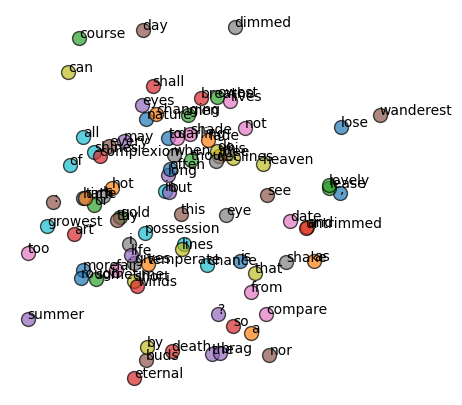

In [313]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Reduce dimensionality with PCA
pca = PCA(n_components=2)
reduced_embeddings = pca.fit_transform(embeddings)

# Plot the embeddings
plt.figure(figsize=(5, 5), dpi=100)
for i, word in enumerate(model.wv.index_to_key):
    plt.scatter(reduced_embeddings[i, 0], reduced_embeddings[i, 1], cmap='tab20', s=100, edgecolors='k', alpha=0.7)
    plt.annotate(word, (reduced_embeddings[i, 0], reduced_embeddings[i, 1]))
plt.axis('off')
plt.show()

### Andrew Trusk tutorial

In [314]:
## Image a case from a book by Andrew Trask Grokking Deep Learning where he discusses king and queen
# help me to reproduce the same example using word2vec and cosine similarity

# Define the vocabulary for the model
sentences = [
    ['king', 'is', 'a', 'strong', 'man'],
    ['queen', 'is', 'a', 'wise', 'woman'],
    ['prince', 'is', 'the', 'male', 'son', 'of', 'king'],
    ['princess', 'is', 'the', 'daughter', 'of', 'king'],
    ['princess', 'is', 'the', 'daughter', 'of', 'queen'],
    ['prince', 'is', 'the', 'son', 'of', 'queen'],
    # some more sentences to capture the context
    ['king', 'is', 'the', 'husband', 'of', 'queen'],
    ['queen', 'is', 'the', 'wife', 'of', 'king'],
    # add some qualifiers to the king and queen
    ['king', 'is', 'the', 'husband', 'of', 'queen', 'and', 'the', 'ruler', 'of', 'the', 'kingdom'],
    ['queen', 'is', 'the', 'wife', 'of', 'king', 'and', 'the', 'ruler', 'of', 'the', 'kingdom'],
]

# Train Word2Vec model
model = Word2Vec(sentences, vector_size=12, window=10, min_count=1, sg=0)

# select embedding for the word 'king'
embedding_king = model.wv['king']
print(embedding_king)

# select embedding for the word 'queen'
embedding_queen = model.wv['queen']
print(embedding_queen)

# select embedding for the word 'prince'
embedding_prince = model.wv['prince']
embedding_princess = model.wv['princess']

# compute cosine similarity between the two embeddings
similarity = model.wv.similarity('king', 'son')

print(similarity)

[ 0.04153327  0.07683995 -0.067991    0.03753285 -0.03463634  0.00700367
  0.07095317 -0.03707495  0.0378334  -0.05670227 -0.02964771  0.07852678]
[ 0.06745049 -0.04951811  0.00035916 -0.03970706 -0.08030658  0.04184702
 -0.07314587 -0.03661921 -0.00025095 -0.00248729 -0.06392261  0.08033732]
0.21318932


In [315]:
from pprint import pprint

word_to_find = 'wise'
similar_words = model.wv.most_similar(word_to_find)
pprint(f"Words similar to '{word_to_find}': {similar_words})")

("Words similar to 'wise': [('and', 0.8865184187889099), ('man', "
 "0.5989653468132019), ('is', 0.4767609238624573), ('of', "
 "0.46920526027679443), ('kingdom', 0.25509563088417053), ('king', "
 "0.2471051663160324), ('husband', 0.1911420375108719), ('strong', "
 "0.12493626773357391), ('queen', 0.11744857579469681), ('ruler', "
 '0.023312026634812355)])')


/var/folders/k_/yz8rvp25185_js60dw8vhnj40000gn/T/ipykernel_71276/1703367928.py:11: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(reduced_embeddings[i, 0], reduced_embeddings[i, 1], cmap='tab20', s=100, edgecolors='k', alpha=0.7)


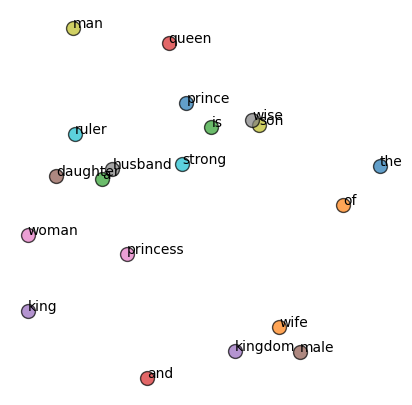

In [316]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Reduce dimensionality with PCA
pca = PCA(n_components=2)
reduced_embeddings = pca.fit_transform(embeddings)

# Plot the embeddings
plt.figure(figsize=(5, 5), dpi=100)
for i, word in enumerate(model.wv.index_to_key):
    plt.scatter(reduced_embeddings[i, 0], reduced_embeddings[i, 1], cmap='tab20', s=100, edgecolors='k', alpha=0.7)
    plt.annotate(word, (reduced_embeddings[i, 0], reduced_embeddings[i, 1]))
plt.axis('off')
plt.show()

In [317]:
result = model.wv.most_similar(positive=['ruler', 'princess'], negative=['man'])
print(f"Result of the analogy 'ruler - man + princess': {result}")

Result of the analogy 'ruler - man + princess': [('prince', 0.45515406131744385), ('wife', 0.39043161273002625), ('woman', 0.3563167452812195), ('son', 0.22170588374137878), ('husband', 0.18164542317390442), ('daughter', 0.10075923055410385), ('queen', 0.0909455418586731), ('a', -0.0024905127938836813), ('strong', -0.061705704778432846), ('male', -0.1201256588101387)]


### Bert Model for Sentiment Analysis

In [332]:
import torch
from transformers import BertTokenizer, BertForSequenceClassification
from torch.utils.data import DataLoader, TensorDataset, RandomSampler, SequentialSampler
from sklearn.model_selection import train_test_split
from torch.optim import AdamW
from torch.optim.lr_scheduler import ReduceLROnPlateau
from sklearn.metrics import accuracy_score, classification_report

# set random seed
torch.manual_seed(0)

# Sample data
texts = [
    "Shall I compare thee to a summer's day?",
    "Thou art more lovely and more temperate",
    "Rough winds do shake the darling buds of May",
    "But thy eternal summer shall not fade",
    "Nor lose possession of that fair thou owest",
    "So long as men can breathe or eyes can see",
    "Sometime too hot the eye of heaven shines",
    "And often is his gold complexion dimmed"
]
labels = [1, 0, 1, 1, 0, 1, 1, 0]

# Load BERT tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# Tokenize the data
input_ids = []
attention_masks = []

for text in texts:
    encoded_dict = tokenizer.encode_plus(
        text,
        add_special_tokens=True,
        max_length=64,
        padding='max_length',
        truncation=True,
        return_attention_mask=True,
        return_tensors='pt'
    )
    input_ids.append(encoded_dict['input_ids'])
    attention_masks.append(encoded_dict['attention_mask'])

input_ids = torch.cat(input_ids, dim=0)
attention_masks = torch.cat(attention_masks, dim=0)
labels = torch.tensor(labels)

# Split data into training and validation sets
train_inputs, val_inputs, train_labels, val_labels = train_test_split(input_ids, labels, random_state=42, test_size=0.3)
train_masks, val_masks, _, _ = train_test_split(attention_masks, attention_masks, random_state=42, test_size=0.3)

# Create DataLoader for training and validation
batch_size = 10

train_dataset = TensorDataset(train_inputs, train_masks, train_labels)
train_dataloader = DataLoader(train_dataset, sampler=RandomSampler(train_dataset), batch_size=batch_size)

val_dataset = TensorDataset(val_inputs, val_masks, val_labels)
val_dataloader = DataLoader(val_dataset, sampler=SequentialSampler(val_dataset), batch_size=batch_size)

# Load pre-trained BERT model for sequence classification
model = BertForSequenceClassification.from_pretrained(
    'bert-base-uncased',
    num_labels=2,
    output_attentions=False,
    output_hidden_states=False
)

# Move model to GPU if available
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

lr = 4e-5

# Set up optimizer and learning rate scheduler
optimizer = AdamW(model.parameters(), lr=lr, weight_decay=1e-5)  # Updated learning rate
scheduler = ReduceLROnPlateau(optimizer, mode='min', factor=0.1, patience=2)

# Training function
def train(model, dataloader, optimizer, device):
    model.train()
    total_loss = 0

    for batch in dataloader:
        b_input_ids, b_attention_masks, b_labels = tuple(t.to(device) for t in batch)
        model.zero_grad()
        outputs = model(b_input_ids, token_type_ids=None, attention_mask=b_attention_masks, labels=b_labels)
        loss = outputs.loss
        total_loss += loss.item()
        loss.backward()
        optimizer.step()
    return total_loss / len(dataloader)

# Evaluation function
def evaluate(model, dataloader, device):
    model.eval()
    predictions, true_labels = [], []
    total_loss = 0

    for batch in dataloader:
        b_input_ids, b_attention_masks, b_labels = tuple(t.to(device) for t in batch)
        with torch.no_grad():
            outputs = model(b_input_ids, token_type_ids=None, attention_mask=b_attention_masks, labels=b_labels)
        loss = outputs.loss
        total_loss += loss.item()
        logits = outputs.logits
        predictions.extend(torch.argmax(logits, dim=1).tolist())
        true_labels.extend(b_labels.tolist())
    avg_loss = total_loss / len(dataloader)
    accuracy = accuracy_score(true_labels, predictions)
    return avg_loss, accuracy

# Training loop with validation and early stopping
epochs = 30
best_accuracy = 0
early_stopping_patience = 3
early_stopping_counter = 0

for epoch in range(epochs):
    print(f"Epoch {epoch + 1}/{epochs}")
    train_loss = train(model, train_dataloader, optimizer, device)
    val_loss, val_accuracy = evaluate(model, val_dataloader, device)
    scheduler.step(val_loss)
    
    print(f"Training Loss: {train_loss:.4f}")
    print(f"Validation Loss: {val_loss:.4f}")
    print(f"Validation Accuracy: {val_accuracy:.4f}")
    
    # Check for early stopping
    if val_accuracy > best_accuracy:
        best_accuracy = val_accuracy
        early_stopping_counter = 0
        torch.save(model.state_dict(), 'best_model.pt')
    else:
        early_stopping_counter += 1
        if early_stopping_counter >= early_stopping_patience:
            print("Early stopping triggered")
            break

# Load the best model
model.load_state_dict(torch.load('best_model.pt'))

# Inference on new data
new_texts = [
    # "Sometime too hot the eye of heaven shines",
    # "And often is his gold complexion dimmed",
    # "And every fair from fair sometime declines",
    # "By chance or nature's changing course untrimmed"
    "Sometime too hot the eye of heaven shines",
    "And often is his gold complexion dimmed",
    "And every fair from fair sometime declines",
    "By chance or nature's changing course untrimmed",
    "The quick brown fox jumps over the lazy dog",
    "A journey of a thousand miles begins with a single step",
    "To be or not to be, that is the question",
    "All that glitters is not gold",
    "The pen is mightier than the sword",
    "A picture is worth a thousand words",
    "Actions speak louder than words",
    "Beauty is in the eye of the beholder",
    "Necessity is the mother of invention",
    "Familiarity breeds contempt",
    "You can't judge a book by its cover"
]

new_input_ids = []
new_attention_masks = []
for text in new_texts:
    encoded_dict = tokenizer.encode_plus(
        text,
        add_special_tokens=True,
        max_length=64,
        padding='max_length',
        truncation=True,
        return_attention_mask=True,
        return_tensors='pt'
    )
    new_input_ids.append(encoded_dict['input_ids'])
    new_attention_masks.append(encoded_dict['attention_mask'])

new_input_ids = torch.cat(new_input_ids, dim=0)
new_attention_masks = torch.cat(new_attention_masks, dim=0)

model.eval()
with torch.no_grad():
    outputs = model(new_input_ids.to(device), token_type_ids=None, attention_mask=new_attention_masks.to(device))
logits = outputs.logits
predictions = torch.argmax(logits, dim=1)
print(f"Predictions: {predictions}")

# Evaluate the model accuracy on new data
# new_labels = [1, 0, 1, 0]
new_labels = [1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1]

accuracy = accuracy_score(new_labels, predictions.cpu().numpy())
print(f"Accuracy: {accuracy}")

print(classification_report(new_labels, predictions.cpu().numpy()))

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1/30
Training Loss: 0.8447
Validation Loss: 0.7007
Validation Accuracy: 0.3333
Epoch 2/30
Training Loss: 0.6601
Validation Loss: 0.6422
Validation Accuracy: 0.6667
Epoch 3/30
Training Loss: 0.6468
Validation Loss: 0.6276
Validation Accuracy: 0.6667
Epoch 4/30
Training Loss: 0.5356
Validation Loss: 0.6192
Validation Accuracy: 0.6667
Epoch 5/30
Training Loss: 0.4888
Validation Loss: 0.6074
Validation Accuracy: 0.6667
Early stopping triggered
Predictions: tensor([1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1])
Accuracy: 0.7333333333333333
              precision    recall  f1-score   support

           0       1.00      0.43      0.60         7
           1       0.67      1.00      0.80         8

    accuracy                           0.73        15
   macro avg       0.83      0.71      0.70        15
weighted avg       0.82      0.73      0.71        15

